## Assignment 4 - CS312 - DAV

In [1]:
# Importing 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot 

C:\Users\janma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### 1. Merge two data frames such that the new data frame has multi-level columns (like years under milk and eggs). Try to change the column names if required.

In [2]:
milk_df = pd.read_csv("Milk_Production_2007_2012.csv")
milk_df = milk_df.set_index('States/Uts')
columns = [('Milk','2007-08'),('Milk','2008-09'),('Milk','2009-10'),('Milk','2010-11'),('Milk','2011-12')]
milk_df.columns = pd.MultiIndex.from_tuples(columns)
milk_df.head()

Milk                                
                  2007-08 2008-09 2009-10 2010-11 2011-12
States/Uts                                               
Andhra Pradesh       8925    9570   10429   11203   12088
Arunachal Pradesh      32      24      26      28      22
Assam                 752     753     756     790     796
Bihar                5783    5934    6124    6517    6643
Chhattisgarh          866     908     956    1029    1119

In [3]:
egg_df = pd.read_csv("Egg_Production_2007_2012.csv")
egg_df.rename(columns = {'2007-08 (In lakh nos.)':'2007-2008', 
                         '2008-09 (In lakh nos.)':'2008-2009',
                         '2009-10 (In lakh nos.)':'2009-2010',
                         '2010-11 (In lakh nos.)':'2010-2011',
                         '2011-12 (In lakh nos.)':'2011-2012'}, inplace = True)
egg_df = egg_df.set_index('States/Uts')
columns = [('Eggs','2007-2008'),('Eggs','2008-2009'),('Eggs','2009-2010'),('Eggs','2010-2011'),('Eggs','2011-2012')]
egg_df.columns = pd.MultiIndex.from_tuples(columns)
egg_df.head()

Eggs                                        
                  2007-2008 2008-2009 2009-2010 2010-2011 2011-2012
States/Uts                                                         
Andhra Pradesh       175884    183446    193958    201277    212103
Arunachal Pradesh       394       361       380       407       419
Assam                  4910      4659      4671      4707      4705
Bihar                 10707     10740     11002      7446      7552
Chhattisgarh           9184      9738     10520     12454     12984

In [4]:
merged = milk_df.join(egg_df)
merged.head()

Milk                                      Eggs            \
                  2007-08 2008-09 2009-10 2010-11 2011-12 2007-2008 2008-2009   
States/Uts                                                                      
Andhra Pradesh       8925    9570   10429   11203   12088    175884    183446   
Arunachal Pradesh      32      24      26      28      22       394       361   
Assam                 752     753     756     790     796      4910      4659   
Bihar                5783    5934    6124    6517    6643     10707     10740   
Chhattisgarh          866     908     956    1029    1119      9184      9738   

                                                 
                  2009-2010 2010-2011 2011-2012  
States/Uts                                       
Andhra Pradesh       193958    201277    212103  
Arunachal Pradesh       380       407       419  
Assam                  4671      4707      4705  
Bihar                 11002      7446      7552  
Chhattisgarh          10520     12454     12984

### 2. Present the production of milk in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab on 2007-2008 as a Pie chart. The pie chart should consist of proportion in percentage and labels for each piece.

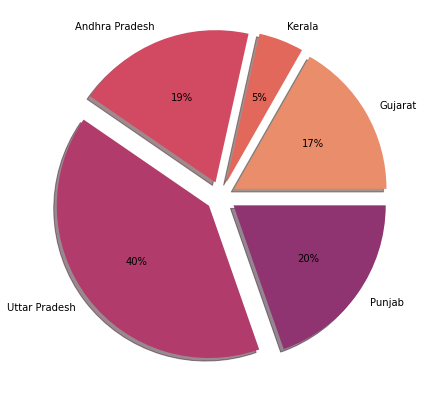

In [5]:
q1 = merged.iloc[:,0:1]
states = ["Gujarat","Kerala","Andhra Pradesh","Uttar Pradesh","Punjab"]
q1 = q1.filter(items=states,axis=0)
q1 = q1.T
vals = q1.values.flatten()
label = q1.columns.tolist()
explode = [0.1,0.1,0.1,0.1,0.1]
colors = sns.color_palette('flare')[0:5]
plt.figure(figsize=(7,7)) 
plt.pie(vals, labels=label, autopct='%.0f%%', colors=colors, explode=explode, shadow = 'True')
plt.show()

### 3. Plot five pie charts of egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for the five years range. Each pie chart should represent the proportional egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for a given year.

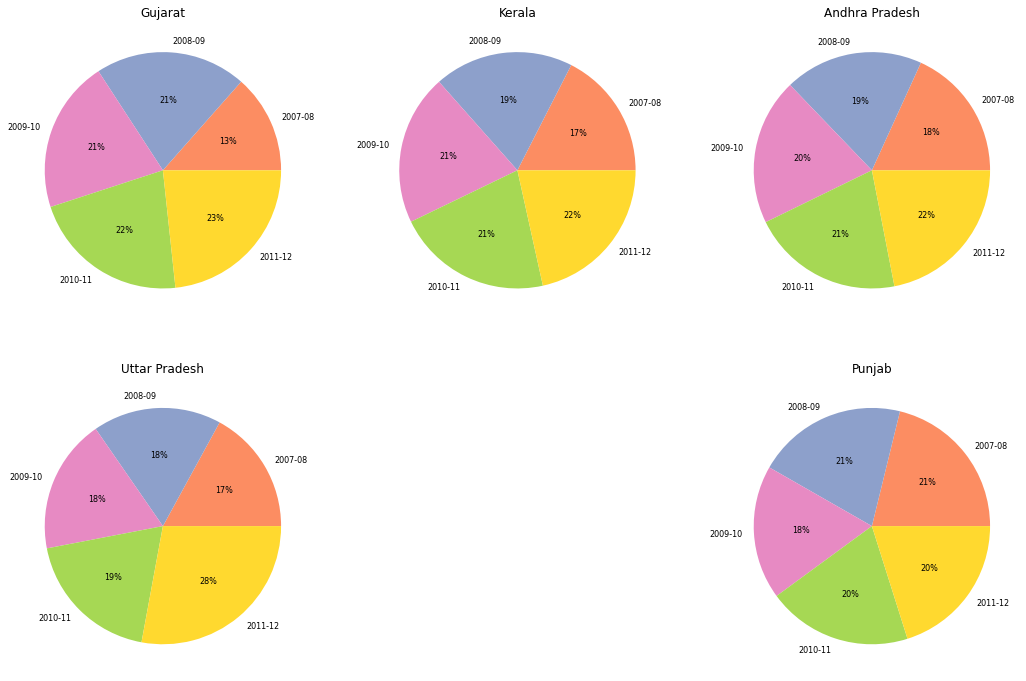

In [6]:
fig, axes = plt.subplots(2,3,figsize=(18,12), squeeze=True)
q2 = egg_df.filter(items=states, axis=0)
vals = q2.values
labels = ["2007-08", "2008-09", "2009-10", "2010-11", "2011-12"]
fig.delaxes(axes[1][1])
colors = sns.color_palette("Set2")[1:6]
axes[0][0].pie(q2.loc[("Gujarat")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,0].set_title("Gujarat")
axes[0][1].pie(q2.loc[("Kerala")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,1].set_title("Kerala")
axes[0][2].pie(q2.loc[("Andhra Pradesh")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[0,2].set_title("Andhra Pradesh")
axes[1][0].pie(q2.loc[("Uttar Pradesh")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[1,0].set_title("Uttar Pradesh")
axes[1][2].pie(q2.loc[("Punjab")].values, colors=colors, labels=labels, autopct='%.0f%%', textprops={'fontsize': 8})
axes[1,2].set_title("Punjab");

### 4. Plot Stacked Area Chart that represents the proportional egg production state wise over five years. There would be five stacked colors for Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab.

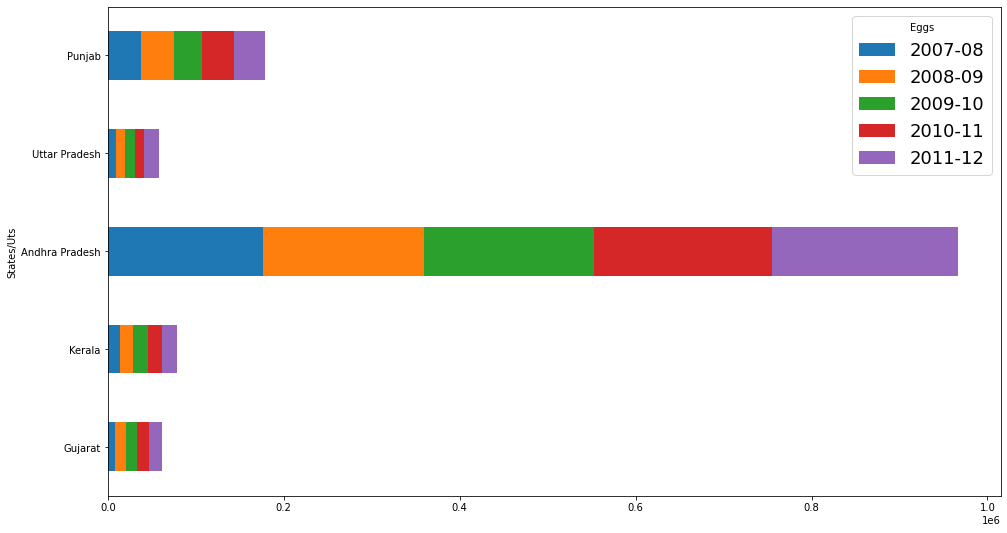

In [7]:
q2.plot(kind='barh', stacked=True, figsize=(16,9));
plt.legend(["2007-08", "2008-09", "2009-10", "2010-11", "2011-12"], title='Eggs', prop={'size':18});